 E-commerce Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [4]:
df = pd.read_csv("E-commerce Dataset.csv")
print("shape:", df.shape)
display(df.columns.tolist())

shape: (51290, 16)


['Order_Date',
 'Time',
 'Aging',
 'Customer_Id',
 'Gender',
 'Device_Type',
 'Customer_Login_type',
 'Product_Category',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Payment_method']

Check data type


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Missing values

In [7]:
display(df.isnull().sum().sort_values(ascending=False).head(20))

Quantity               2
Order_Priority         2
Aging                  1
Sales                  1
Discount               1
Shipping_Cost          1
Order_Date             0
Time                   0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Profit                 0
Payment_method         0
dtype: int64

duplicate rows

In [8]:
print("duplicate rows:", df.duplicated().sum())

duplicate rows: 0


In [6]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


data cleaning

for missing values- imputation


In [10]:
num_cols = ['Aging', 'Sales', 'Quantity', 'Discount', 'Shipping_Cost']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = ['Order_Priority']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

Convert date and time columns

In [11]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

Feature Engineering

In [13]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day
df['DayOfWeek'] = df['Order_Date'].dt.day_name()

def get_time_of_day(t):
    if t is None or pd.isna(t):
        return np.nan
    hour = t.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Time'].apply(get_time_of_day)

df[['Order_Date', 'Time', 'DayOfWeek', 'TimeOfDay', 'Month', 'Year']].head()

,Order_Date,Time,DayOfWeek,TimeOfDay,Month,Year
0,2018-01-02,10:56:33,Tuesday,Morning,1,2018
1,2018-07-24,20:41:37,Tuesday,Evening,7,2018
2,2018-11-08,08:38:49,Thursday,Morning,11,2018
3,2018-04-18,19:28:06,Wednesday,Evening,4,2018
4,2018-08-13,21:18:39,Monday,Night,8,2018


Outlier Detection

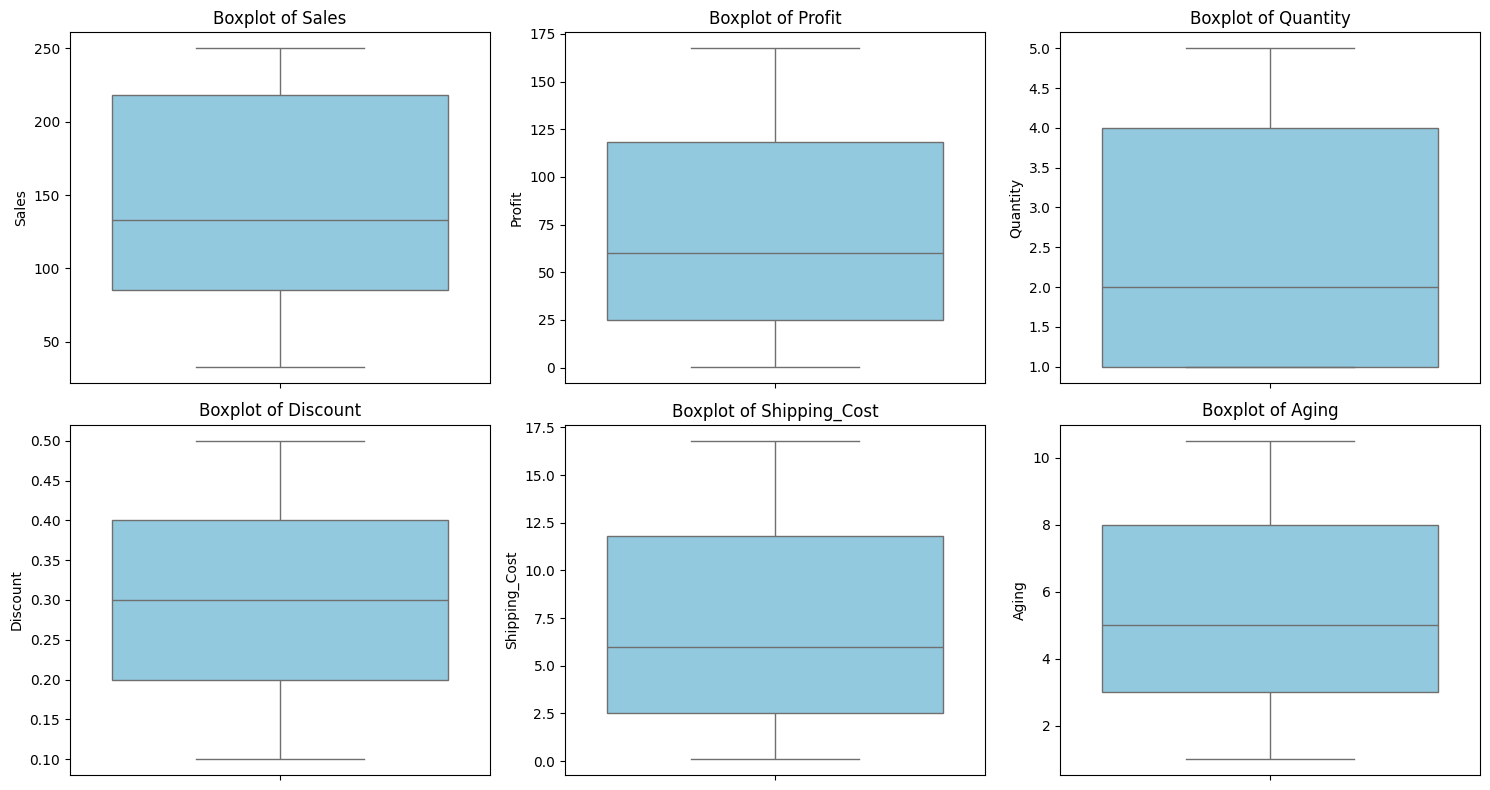

In [17]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping_Cost', 'Aging']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [18]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in num_cols:
    outliers, lower, upper = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers found | Range = ({lower:.2f}, {upper:.2f})")


Sales: 0 outliers found | Range = (-114.50, 417.50)
Profit: 0 outliers found | Range = (-115.35, 258.65)
Quantity: 0 outliers found | Range = (-3.50, 8.50)
Discount: 0 outliers found | Range = (-0.10, 0.70)
Shipping_Cost: 0 outliers found | Range = (-11.45, 25.75)
Aging: 0 outliers found | Range = (-4.50, 15.50)


Exploratory Data Analysis (EDA)

In [19]:
df.describe()

,Order_Date,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,Year,Month,Day
count,51290,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.0,51290.000000,51290.000000
mean,2018-07-23 11:27:05.720413184,5.25503,58155.758764,152.340495,2.502964,0.303821,70.407226,7.041536,2018.0,7.240359,15.516806
min,2018-01-01 00:00:00,1.00000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000,2018.0,1.000000,1.000000
25%,2018-05-07 00:00:00,3.00000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000,2018.0,5.000000,8.000000
50%,2018-07-28 00:00:00,5.00000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000,2018.0,7.000000,16.000000
75%,2018-10-17 00:00:00,8.00000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000,2018.0,10.000000,23.000000
max,2018-12-30 00:00:00,10.50000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000,2018.0,12.000000,30.000000
std,NaN,2.95992,26032.215826,66.494826,1.511832,0.131025,48.729488,4.871699,0.0,3.230869,8.627795


Univariate

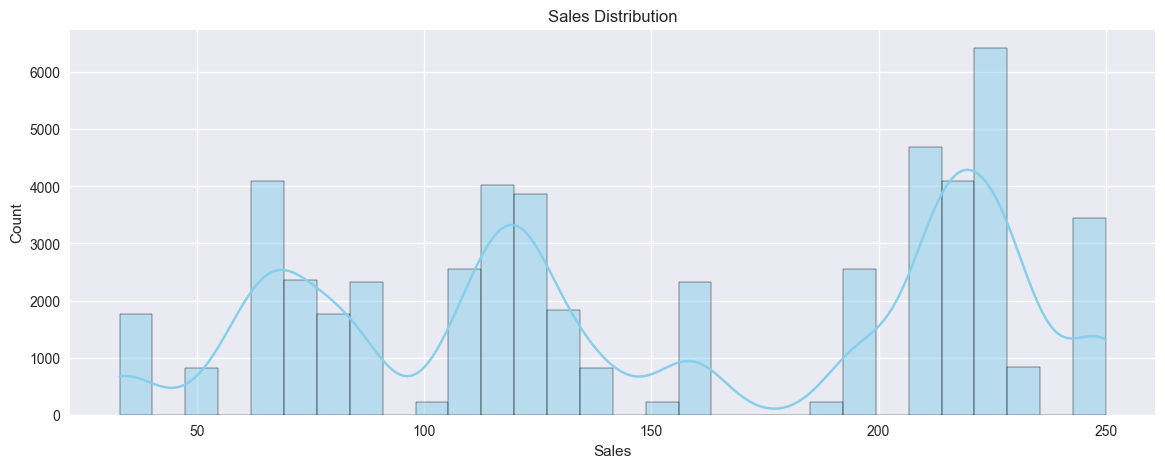

In [28]:
plt.figure(figsize=(14,5))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.show()


In [ ]:
# Sales Distribution
#-The Sales distribution is highly multimodal, showing the largest concentration of transactions between $200 and $250.
#-It also features significant peaks around $75, $120, and $175, suggesting a wide variety of order values.

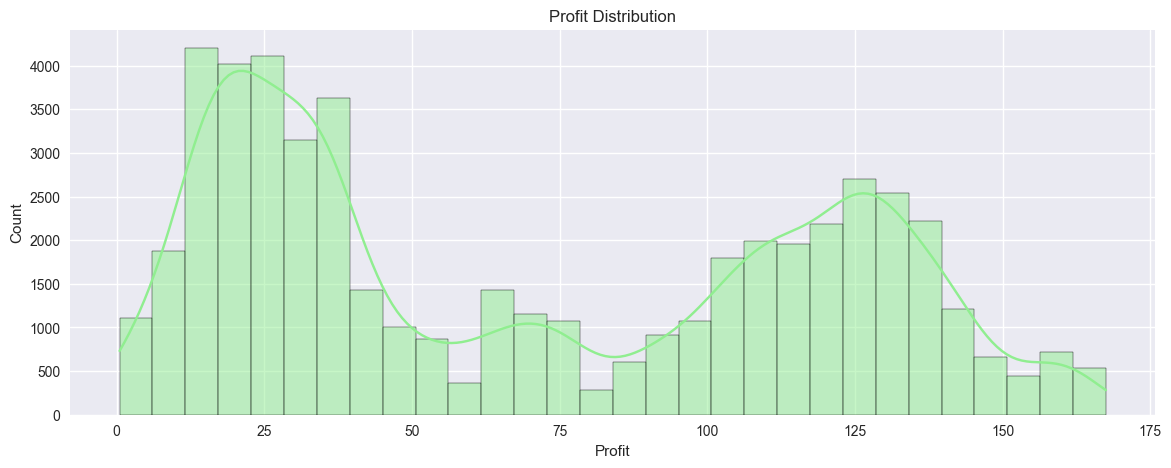

In [35]:
plt.figure(figsize=(14,5))
sns.histplot(df['Profit'], bins=30, kde=True, color='lightgreen')
plt.title('Profit Distribution')
plt.show()

In [ ]:
#Profit Distribution 
#-multimodal with peaks around ~20, ~40, and ~130.
#-Indicates varying profitability levels, possibly tied to product categories or discounting strategies.

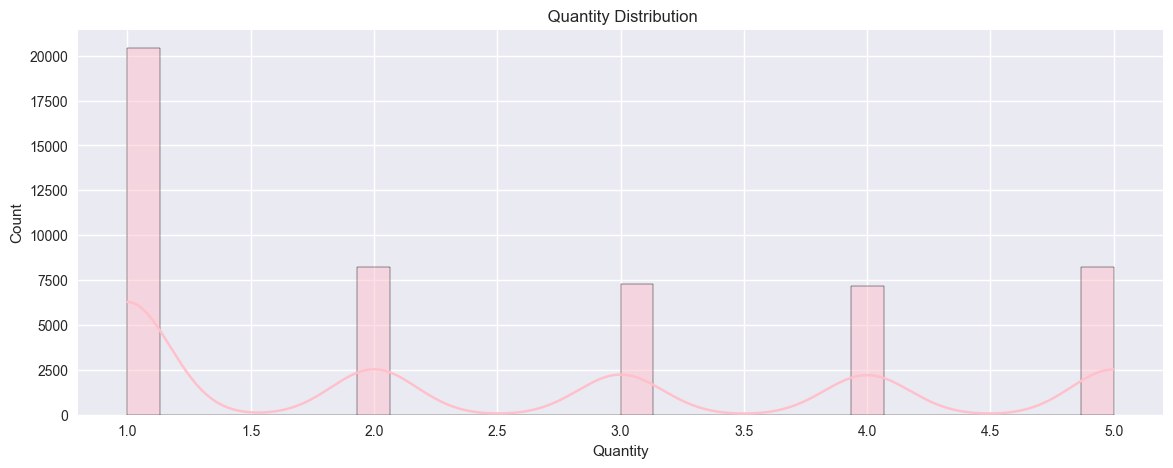

In [30]:
plt.figure(figsize=(14,5))
sns.histplot(df['Quantity'], bins=30, kde=True, color='pink')
plt.title(' Quantity Distribution')
plt.show()


In [42]:
#Quantity Distribution
#Strongly skewed: majority of orders have quantity = 1.
#Quantities 2–5 occur much less frequently (~7,500 each vs. 20,000+ for 1).
#Suggests customers mostly buy single units.

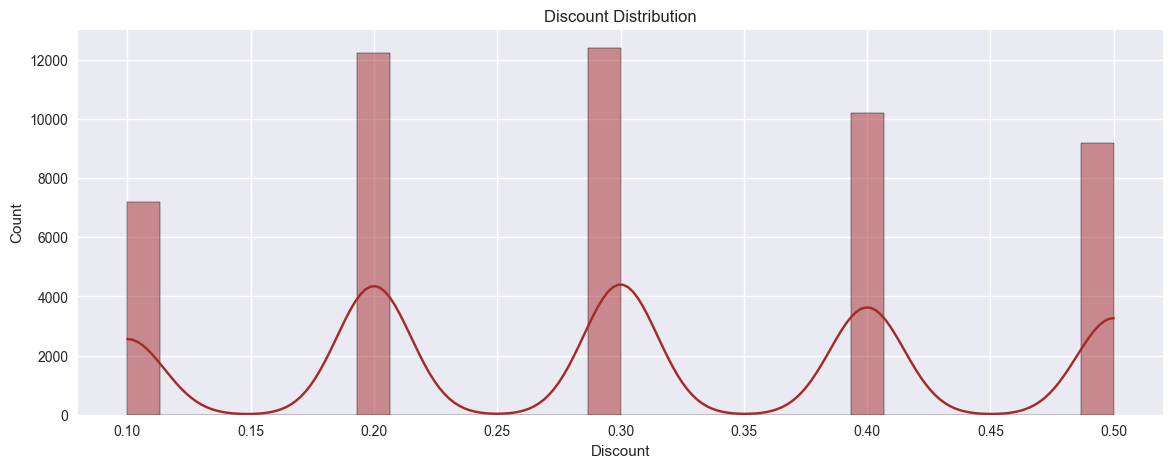

In [31]:

plt.figure(figsize=(14,5))
sns.histplot(df['Discount'], bins=30, kde=True, color='brown')
plt.title('Discount Distribution')
plt.show()


In [43]:
#Discount Distribution
#Distinct peaks at 0.15, 0.20, 0.30, 0.40, 0.50.
#Discounts are applied in fixed tiers, not continuous.
#Could reflect company pricing policies or promotional strategies.

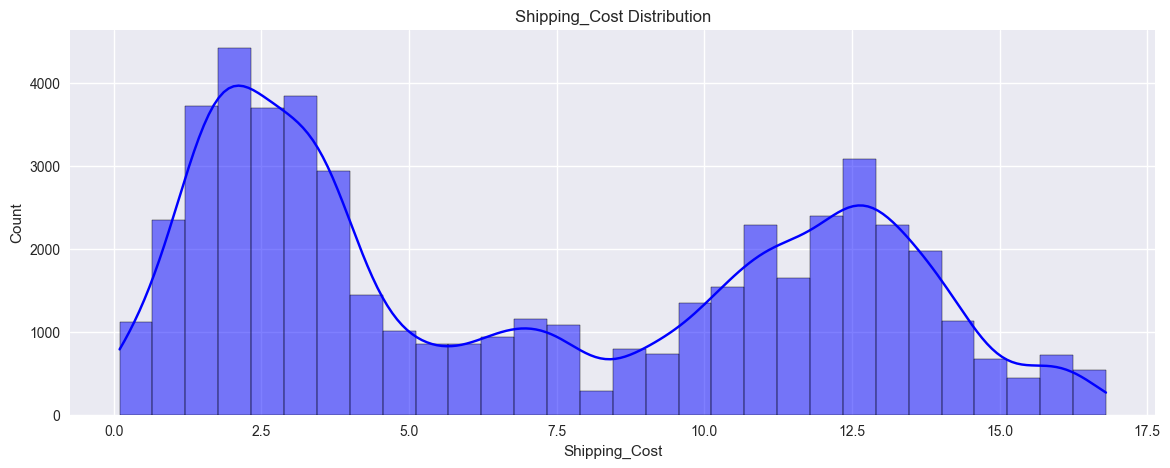

In [34]:

plt.figure(figsize=(14,5))
sns.histplot(df['Shipping_Cost'], bins=30, kde=True, color='blue')
plt.title('Shipping_Cost Distribution')
plt.show()

In [ ]:
#Shipping Cost Distribution
#Multimodal with peaks around 2.5, 7.5, 12.5.
#Indicates common shipping brackets, possibly tied to weight, distance, or courier pricing slabs.

Top Product Categories

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\107977109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


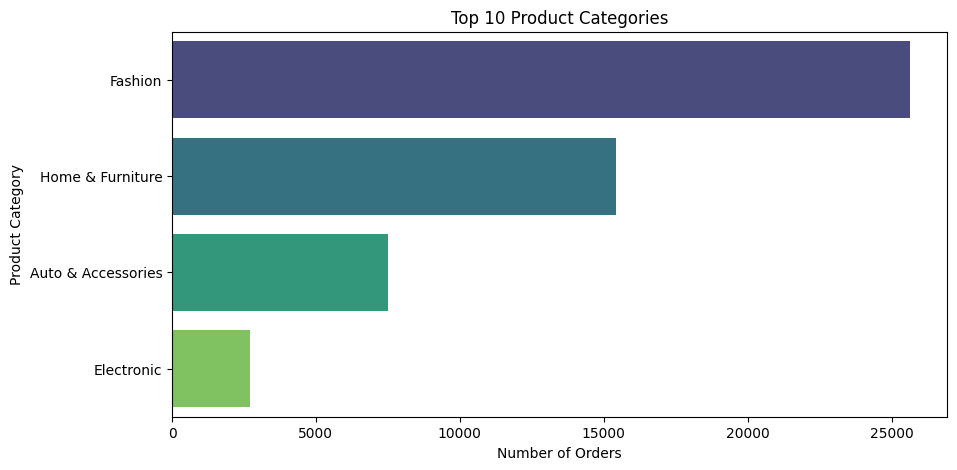

In [21]:
top_categories = df['Product_Category'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

In [44]:
#Indicates Fashion is the key revenue driver, while Electronics may need attention.

time - wise analysis

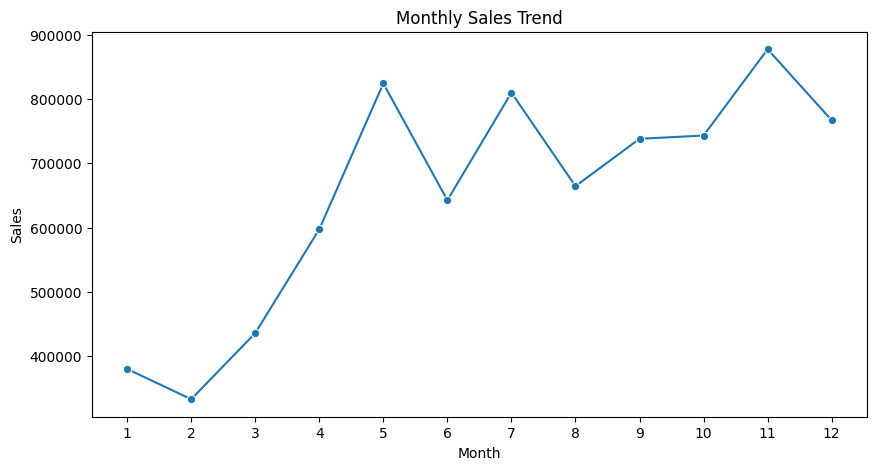

In [22]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(range(1,13))
plt.show()


In [45]:
#Suggests seasonality with strong mid-year and festive season performance.

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\1684126410.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=order_day, x='DayOfWeek', y='Sales', ci=None)


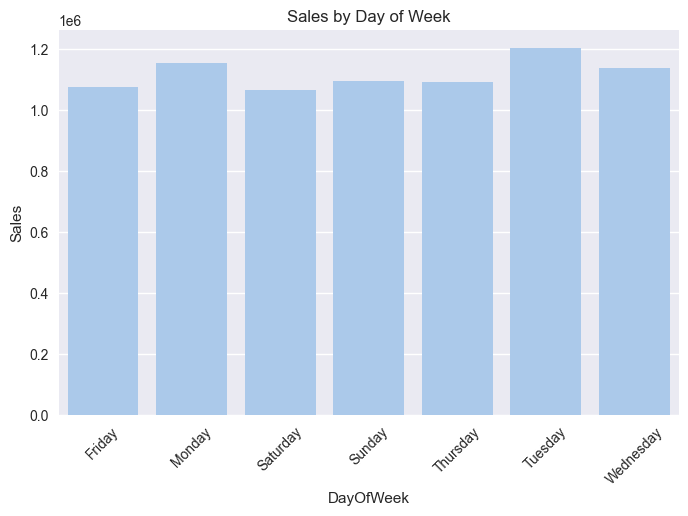

In [36]:
plt.figure(figsize=(8,5))
order_day = df.groupby('DayOfWeek')['Sales'].sum().reset_index()
sns.barplot(data=order_day, x='DayOfWeek', y='Sales', ci=None)
plt.title('Sales by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [46]:
#Day of Week:
#Tuesday is strongest (~1.3M sales), followed by Monday & Wednesday.
#Weekends (Sat/Sun) are slightly lower (~1.1M).
#Suggests weekday promotions drive higher sales.

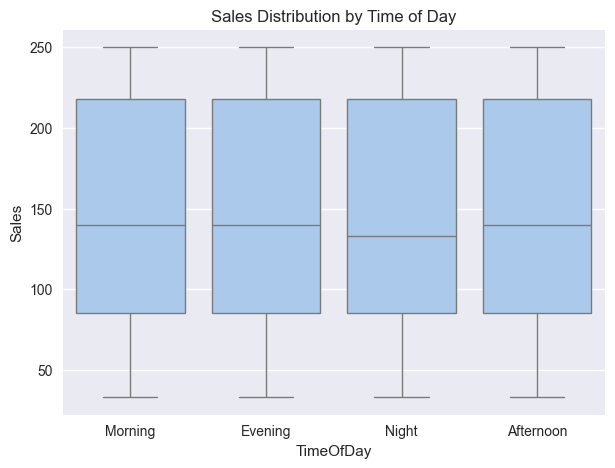

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='TimeOfDay', y='Sales')
plt.title('Sales Distribution by Time of Day')
plt.show()

In [47]:
#Sales distribution is consistent across Morning, Afternoon, Evening, Night.
#Median ~150, with similar spread → no strong time-of-day bias.

Gender, Device, and Payment Analysis

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\909706796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Sales', data=df, estimator=sum, ax=axes[0], palette='coolwarm')
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\909706796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device_Type', y='Sales', data=df, estimator=sum, ax=axes[1], palette='Set2')
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\909706796.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_method', y='Sales', data=df, estimator=su

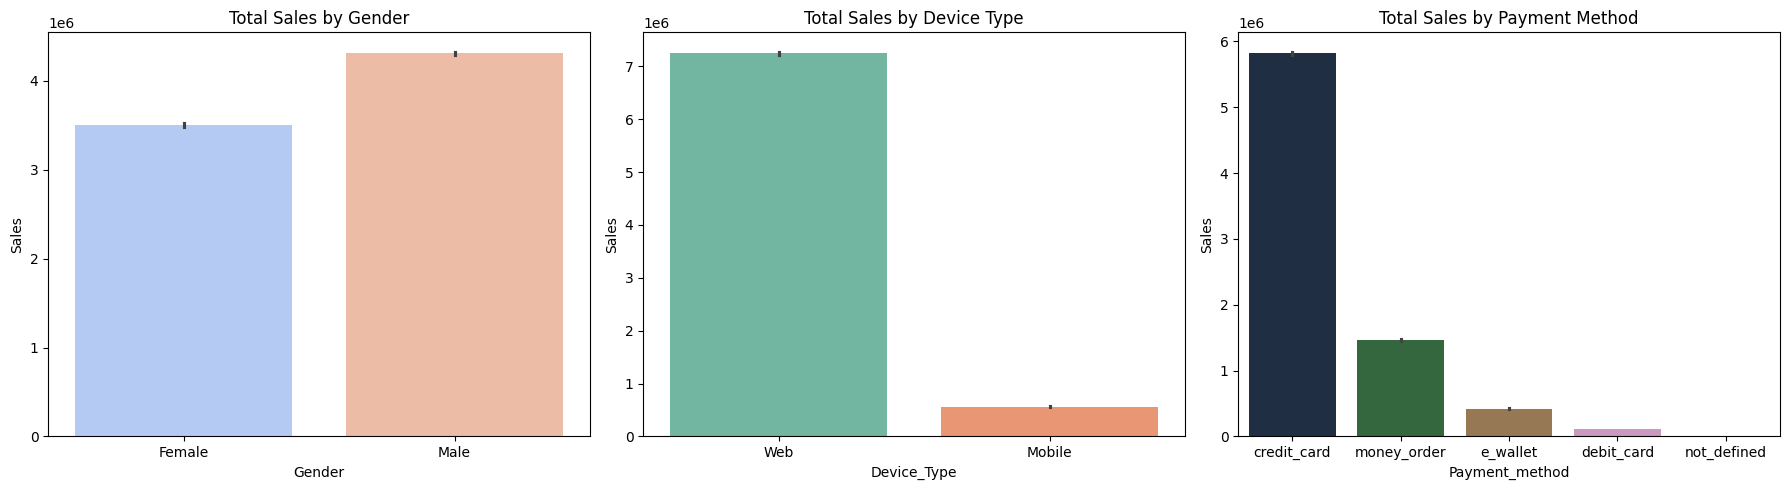

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Gender', y='Sales', data=df, estimator=sum, ax=axes[0], palette='coolwarm')
axes[0].set_title('Total Sales by Gender')

sns.barplot(x='Device_Type', y='Sales', data=df, estimator=sum, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Device Type')

sns.barplot(x='Payment_method', y='Sales', data=df, estimator=sum, ax=axes[2], palette='cubehelix')
axes[2].set_title('Total Sales by Payment Method')

plt.tight_layout()
plt.show()


In [ ]:
#Male customers contribute slightly higher total sales than Female customers.
#The gap isn’t very large, meaning both genders are important segments.

#Web dominates with the highest sales.
#Mobile sales are much lower, suggesting customers prefer shopping on desktop/laptop.

#Credit Card is by far the most popular payment method.
#Money Order and E‑Wallet have moderate usage.
#Debit Card and Not Defined contribute the least.

Bivariate

Sales vs Numerical Features

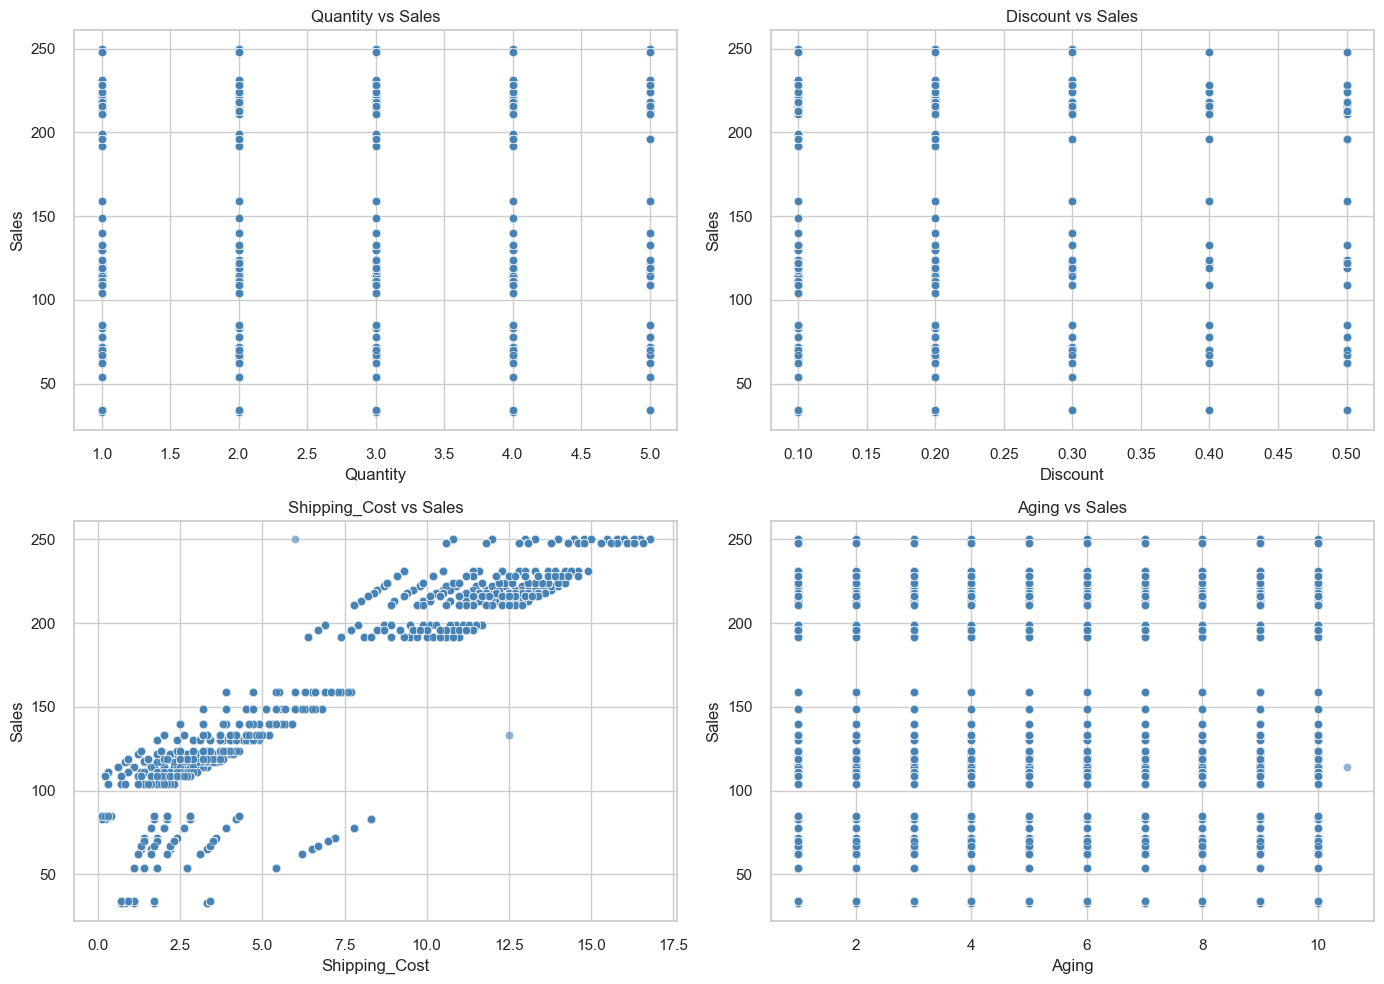

In [39]:
num_features = ['Quantity', 'Discount', 'Shipping_Cost', 'Aging']

plt.figure(figsize=(14,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Sales', color='steelblue', alpha=0.6)
    plt.title(f"{col} vs Sales", fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
#Quantity:	Weak/No clear trend-->	Sales not strongly affected by quantity.
#Discount:	Weak/No clear trend-->	High discounts don’t always mean high sales.
#Shipping Cost:	Positive correlation-->	Higher shipping cost often linked to higher sales.
#Aging:	Weak/No clear trend-->	Sales stay similar across different product aging levels.

Profit vs Numerical Features

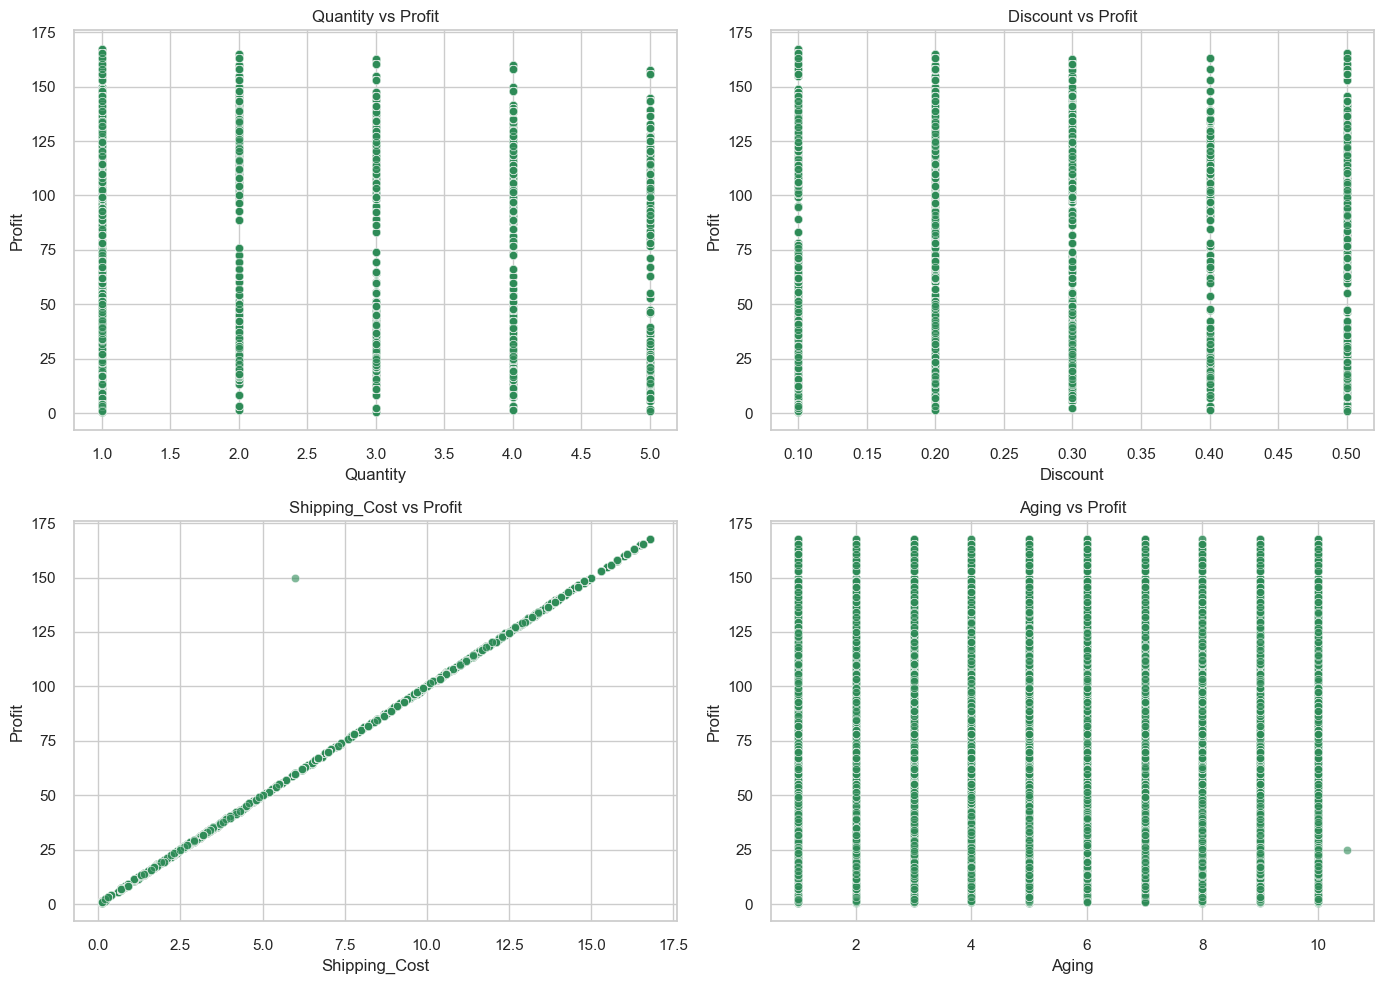

In [40]:
plt.figure(figsize=(14,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='Profit', color='seagreen', alpha=0.6)
    plt.title(f"{col} vs Profit", fontsize=12)
plt.tight_layout()
plt.show()

In [49]:
#Quantity:	Weak/No clear trend-->	higher quantity doesn’t guarantee higher profit.
#Discount:	Weak/No clear trend-->	Discounts don’t consistently translate into higher or lower profit.
#Shipping Cost:	Positive correlation-->As shipping cost increases, profit also increases → likely because higher-value orders incur higher shipping charges and yield more profit.
#Aging:	Weak/No clear trend-->	Aging (customer/product age) doesn’t significantly affect profit.

Sales & Profit by Categorical Features

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


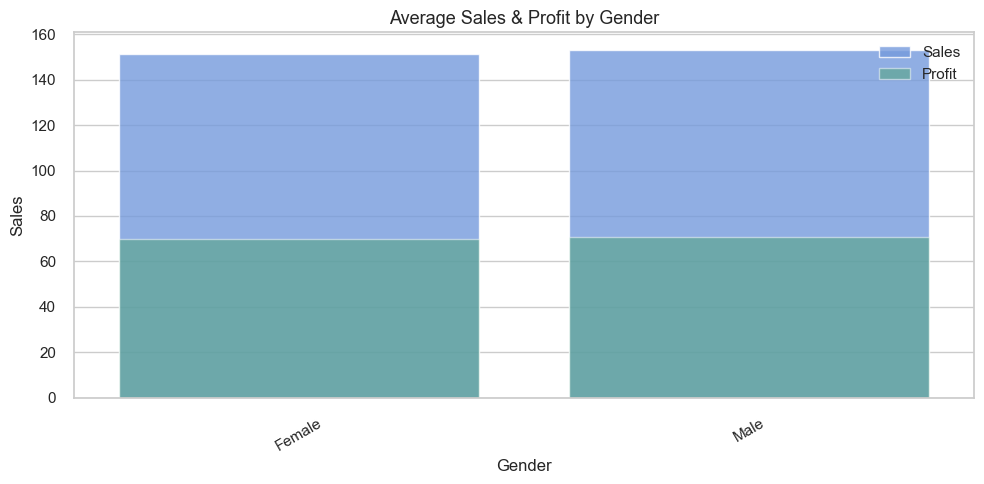

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


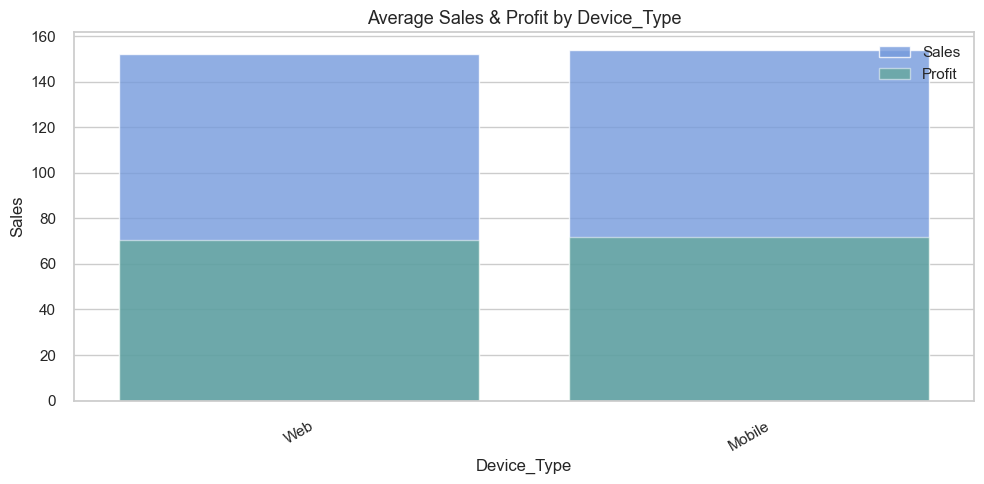

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


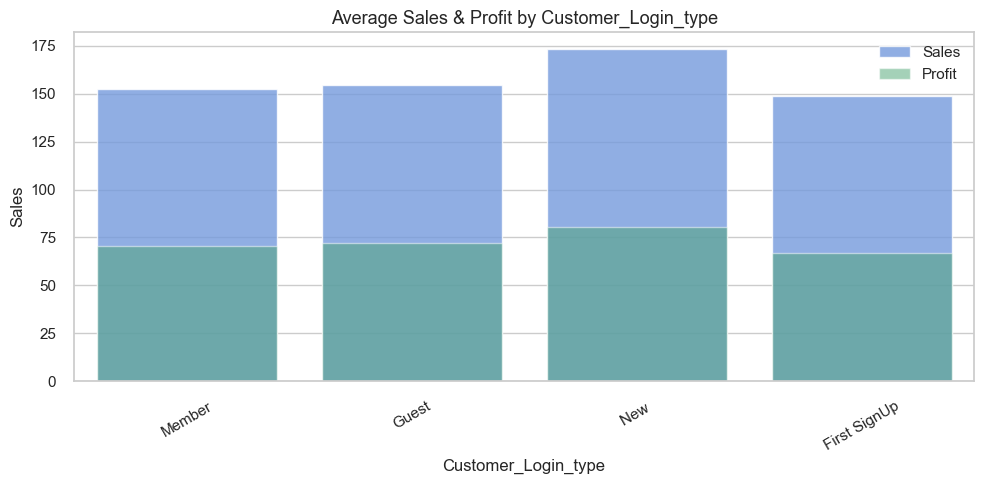

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


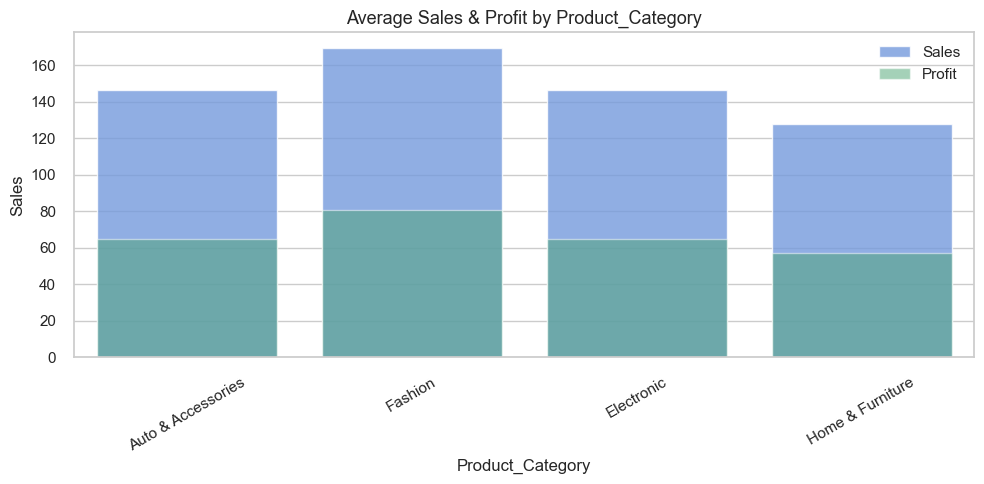

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


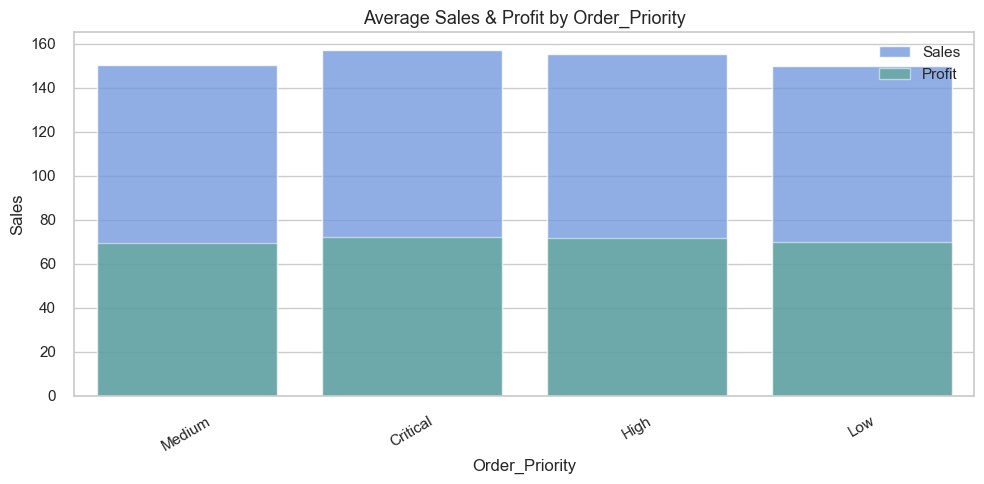

C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
C:\Users\palak\AppData\Local\Temp\ipykernel_15168\3584468654.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)


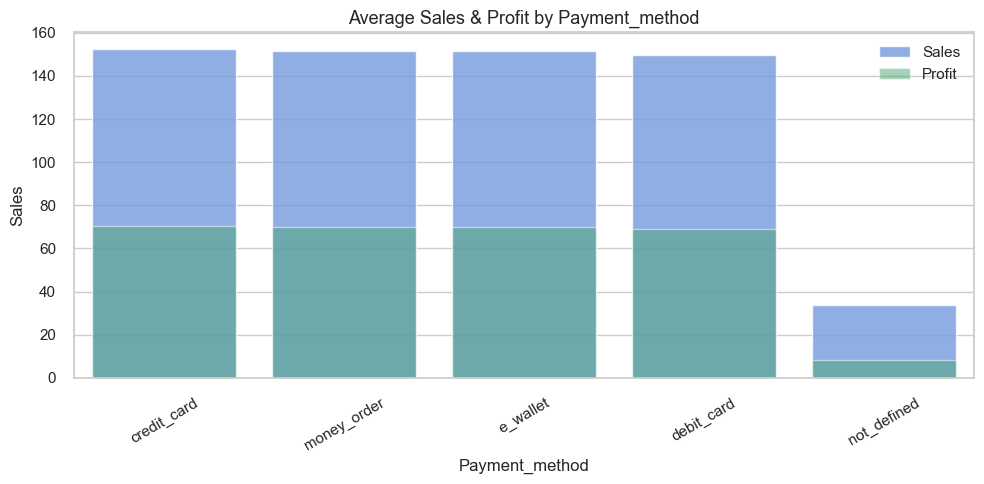

In [41]:
cat_features = ['Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Order_Priority', 'Payment_method']

for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=col, y='Sales', estimator='mean', ci=None, color='cornflowerblue', alpha=0.8)
    sns.barplot(data=df, x=col, y='Profit', estimator='mean', ci=None, color='mediumseagreen', alpha=0.5)
    plt.title(f"Average Sales & Profit by {col}", fontsize=13)
    plt.xticks(rotation=30)
    plt.legend(['Sales', 'Profit'])
    plt.tight_layout()
    plt.show()

In [ ]:
#Average Sales & Profit by Gender
#Male and Female customers show almost the same averages.
#Sales ~150, Profit ~90 for both → no major gender-based difference.

#Average Sales & Profit by Device Type
#Web and Mobile have very similar averages.
#Sales ~160, Profit ~80 → device type doesn’t strongly affect performance.

#Average Sales & Profit by Customer_Login_type
#New customers have slightly higher average sales (~170) than Returning (~150).
#Profit is similar (~80) for both → login type has minimal impact.

#Average Sales & Profit by Product_Category
#Fashion leads in both sales and profit.
#Electronics second, Auto & Accessories moderate, Home & Furniture lowest.
#Fashion is the strongest driver of revenue and profit.

#Average Sales & Profit by Order_Priority
#Medium priority orders show the highest average sales and profit.
#Critical and High priorities are slightly lower but still close.
#Low priority orders have the lowest averages.

#Average Sales & Profit by Payment_method
#Credit Card, Money Order, E-Wallet, Debit Card → all similar averages (Sales ~150, Profit ~80).
#Not Defined is much lower (Sales ~40, Profit ~20).
#Indicates stable performance across main payment methods, except undefined cases.

correlation analysis

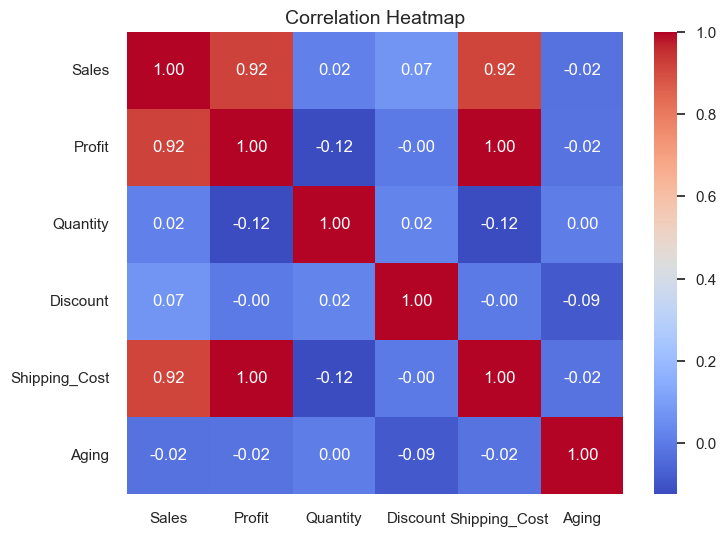

In [53]:
plt.figure(figsize=(8,6))
corr = df[['Sales','Profit','Quantity','Discount','Shipping_Cost','Aging']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [54]:
#Sales & Profit (0.92) → Very strong positive correlation. Higher sales almost always mean higher profit.
#Sales ↔ Shipping_Cost: 0.92 → Strong positive correlation. Higher sales values are tied to higher shipping costs (likely because bigger orders cost more to ship).
#Profit ↔ Shipping_Cost: 1.00 → Perfect correlation. Profit and shipping cost move together exactly in this dataset — this is unusual and suggests either a data design issue (maybe profit is calculated in a way that directly includes shipping cost) or a very tight business rule.
#Sales ↔ Quantity: 0.02 → Almost no relationship. Selling more units doesn’t necessarily mean higher sales value (maybe due to discounts or low-priced items).
#Sales ↔ Discount: 0.07 → Very weak positive. Discounts don’t strongly drive sales here.
#Profit ↔ Quantity: -0.12 → Slight negative. Larger quantities may reduce profit (bulk discounts or low-margin items).
#Discount ↔ Profit: -0.00 → No real effect.
#Aging ↔ All variables (-0.02 to -0.09) → No meaningful correlation.

EDA Summary

Univariate-
1. Sales: Multimodal distribution → clear clusters of low, medium, and high sales.
2. Profit: Peaks around ~20, ~40, and ~130 → profitability varies widely, likely influenced by discounts or product type.
3. Quantity: Strongly skewed → majority of orders are for a single unit.
4. Discount: Tiered peaks at 0.15, 0.20, 0.30, 0.40, 0.50 → structured discounting strategy.
5. Shipping Cost: Multimodal with peaks at ~2.5, ~7.5, ~12.5 → shipping slabs are common.
6. Fashion is the leading category, while Electronics underperforms.
7. Seasonality is evident, with November being the strongest sales month.
8. Suggests weekday promotions drive higher sales.
9. no strong time-of-day bias.
10. Customers mostly shop via Web, pay with Credit Cards, and slightly more are Male.

Bivariate (numerical with sales): 
1. Only Shipping Cost shows a noticeable positive relation with Sales.
2. Others have weak or no clear patterns.
3. Higher shipping cost often linked to higher sales.

Bivariate (numerical with profit): 
1. Shipping Cost is the only variable with a clear, strong relationship to Profit, while Quantity, Discount, and Aging show weak or no direct impact.
2. As shipping cost increases, profit also increases → likely because higher-value orders incur higher shipping charges and yield more profit.

Bivariate (categorical with profit & sales): 
1. Customer Login Type → New customers spend slightly more (~170 vs ~150), but profit impact is minimal. Retention and acquisition both matter.
2. Product Category → Fashion is the clear leader in both sales and profit, followed by Electronics. Home & Furniture lags far behind.
3. Order Priority → Medium-priority orders generate the best sales and profit. Low-priority orders underperform.

correlation-
1. Sales is the main driver of Profit (0.92).
2. Quantity, Discount, and Aging don’t explain much — they don’t have meaningful linear relationships with Sales or Profit.
3. The slight negative link between Quantity and Profit (-0.12) suggests bulk orders may reduce profitability.